# Medical Insurance Cost Data
> Source: __[Insurance Data](https://www.kaggle.com/mirichoi0218/insurance)__
> , Analysis by: __Rupinder Kaur__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statistics

In [2]:
## Reading the dataset
insurance_data = pd.read_csv("insurance.csv")
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis

In [3]:
## Checking for missing values
insurance_data.isna().sum() ## there is no value missing

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
## summary statistics 
insurance_data.describe()
# From below, the minimum someone is paying for medical insurance is $1121.87 and the maximum is $63770.43.
# The mean for insurance charges is $13,270 and median is $9,382-> since the two are not the same, we can say that the 
   # disribution of charges is skewed. In this case median would be better measure of center
    
# Age, bmi and children have very similar values for mean and median

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
## lists for histograms on the next cell
list_col=  insurance_data.select_dtypes([np.number]).columns

colors = ['orange', 'blue', 'green', 'red']

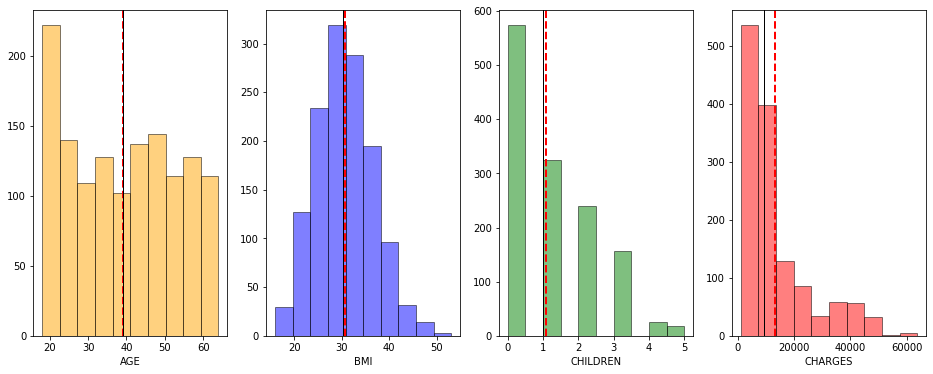

In [7]:
## histograms for numerical columns
plt.figure(figsize=(16,6))

for i in range(len(list_col)):
    plt.subplot(1,4,i+1)
    plt.hist(insurance_data[list_col[i]], alpha = 0.5, edgecolor = 'black', color = colors[i] )
    plt.xlabel(list_col[i].upper())
    plt.axvline(insurance_data[list_col[i]].mean(), color='r', linestyle='dashed', linewidth=2)
    plt.axvline(insurance_data[list_col[i]].median(), color='k', linestyle='solid', linewidth=1)
plt.show()

# age is distributed pretty evenly for the most part
# the distribution of bmi is approximately normal
# most beneficiaries have one child
# the distribution for charges is right skewed -> there are extreme medical insurance costs

# As it was seen before, mean and median are very similar for age, bmi, and children. They are different for charges, which 
 # skewed


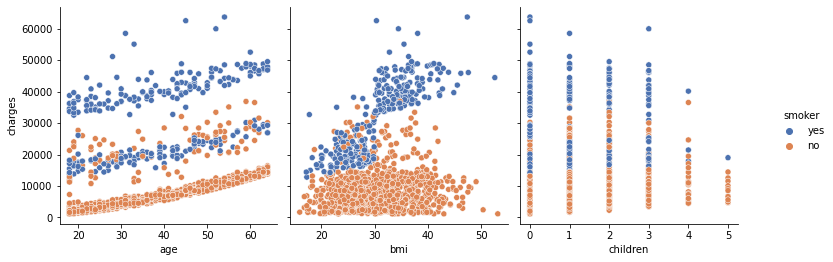

In [8]:
## Plotting numerical features against charges with smoker as hue
g = sns.pairplot(insurance_data, x_vars = ['age', 'bmi','children'],
             y_vars = ['charges'], hue="smoker", palette = "deep")
g.fig.set_size_inches(12,4)

# charges Vs. children: it seems like there are more policy holders with 0,1,2 and 3 children compare to 4 and 5 
   # but there seems to be no relationship between charges and children
# charges Vs. BMI: for non-smoker beneficiaries there seems to be no relationship, but for beneficiaries who smoke, there 
  # a positive linear relationship between charges and bmi
#Charges vs. Age: they seem to be positively related: they seem to be moderately correlated

# smoker have a strong relationship with charges-> we can see from all three scatter plots that beneficiaries who smoke 
  # pay more in medical insurance cost -> it seems that most people who pay above $30000 are smokers

In [9]:
## How many beneficiaries who are paying above $30,000 are smokers?
df1 = insurance_data[insurance_data["charges"]>= 30000]
df1["age"].count()
print(f'Out of {df1["age"].count()} beneficiaries who pay more than $30,000 in medical insurance, {(df1["smoker"] == "yes").sum()} are smokers')

Out of 162 beneficiaries who pay more than $30,000 in medical insurance, 152 are smokers


In [10]:
## Looking into what factors are causing non-smoker beneficiaries to pay more than #30,000?
df1[df1["smoker"] == "no"]

# For age: 9 out of 10 beneficiaries are above 50
# For bmi: 9 out of 10 beneficiaries are in the overweight to obese range

# For charges: all charges are between $30,000 - $37,000 -> so everyone paying above that are policy holders who smoke

,age,sex,bmi,children,smoker,region,charges
62,64,male,24.700,1,no,northwest,30166.61817
115,60,male,28.595,0,no,northeast,30259.99556
242,55,female,26.800,1,no,southwest,35160.13457
387,50,male,25.365,2,no,northwest,30284.64294
573,62,female,36.860,1,no,northeast,31620.00106
599,52,female,37.525,2,no,northwest,33471.97189
936,44,male,29.735,2,no,northeast,32108.66282
1012,61,female,33.330,4,no,southeast,36580.28216
1206,59,female,34.800,2,no,southwest,36910.60803
1258,55,male,37.715,3,no,northwest,30063.58055


In [11]:
## checking  if the people who pay less than $10000 in medical insurance cost are non-smokers
less_10 = insurance_data[insurance_data["charges"] <= 10000]
print(f'Out of {less_10["age"].count()} beneficiaries who pay less than $10,000 in medical insurance, {(less_10["smoker"] == "yes").sum()} are smokers')

Out of 712 beneficiaries who pay less than $10,000 in medical insurance, 0 are smokers


From the analysis so far, "smoker" seems to be strongly correlated with "charges". This can be seen in scatterplots for "charges" against "age", "bmi" and "children". It seems that most policy holders who are paying more than `$`30,000 in medical insurance are smokers. And we confirmed that out of 162 people who pay more than `$`30,000, 152 are smokers. Also, we also confirmed that all beneficiaries who are paying less than `$`10,000 for medical insurance do not smoke.

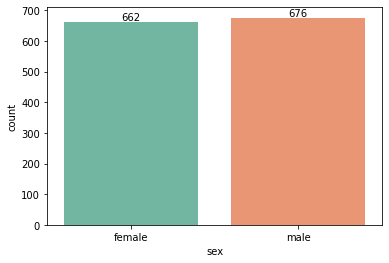

In [12]:
## How many females and males are in the data?
ax = sns.countplot(x = 'sex', data = insurance_data, palette = "Set2")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# As it can be seen from the below plot, the numbers of females and males in the dataset are very similar

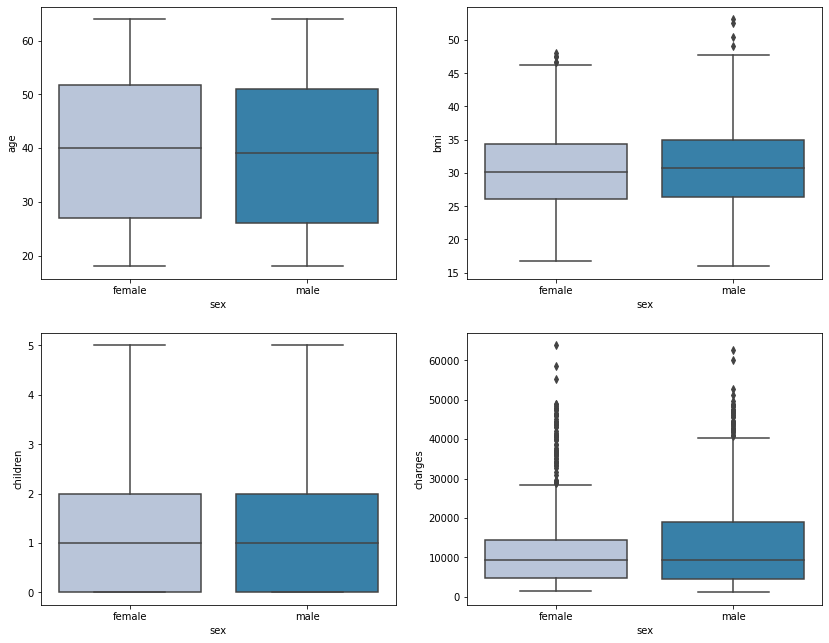

In [13]:
## Exploring the numerical variables against sex of the beneficiaries
fig, axes =plt.subplots(2,2,figsize=(14, 11))

for i in range(len(list_col)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.boxplot(x = "sex", y = list_col[i], data = insurance_data, ax = ax, palette = "PuBu")

plt.show()
# the box plots for age, sex,  and children are very similar for males and females
 # Age: min and max are the same, median for females is slightly higher
 # BMI: min is slightly lower for males and max and median is slightly higher for males, more outliers in bmi for males
 # Children: min, median , max are the same for both females and males
 # Charges: insurance charges for males have more variability-> maximum charges is lower for females compare to males 
    # $30,000 vs. $40,000, and the 75th percentile as well
    # this might be because there are more males who smoke and less females who smoke
   # And there more outliers in charges for females than males

In [14]:
## How many females and male are smokers in the data?
f_smoker = ((insurance_data.sex == "female") & (insurance_data.smoker == "yes")).sum()
m_smoker = ((insurance_data.sex == "male") & (insurance_data.smoker == "yes")).sum()

print(f'Females who smoke: {f_smoker} \nMales who smoke: {m_smoker} \nDifference: {m_smoker-f_smoker}')
# there are 44 more male smokers than female smokers , which can be the reason for increased variability in charges 
  # for males

Females who smoke: 115 
Males who smoke: 159 
Difference: 44


In [15]:
# Exploring region
x = insurance_data.charges.groupby(insurance_data.region).sum()
print(f"\033[1mRegion\033[0m     \033[1mTotal Charges\033[0m \nNortheast  ${x[0]:,.2f} \nNorthwest  ${x[1]:,.2f} \nSoutheast  ${x[2]:,.2f} \nSouthwest  ${x[3]:,.2f}")

# total charges is similar for Northeast, Northwest, Southwest-> however, for Southeast the sum of charges is higher
  # is this because there are more smokers in that region?

Region     Total Charges 
Northeast  $4,343,668.58 
Northwest  $4,035,712.00 
Southeast  $5,363,689.76 
Southwest  $4,012,754.65


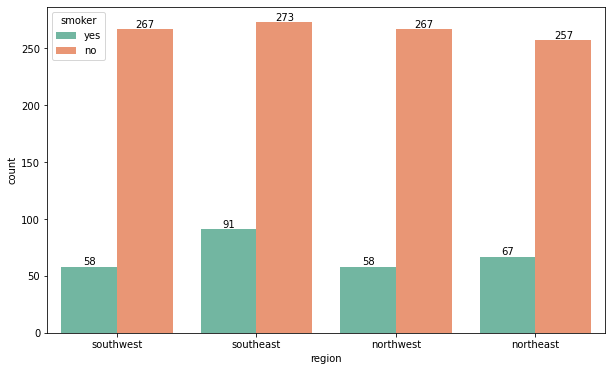

In [16]:
plt.figure(figsize=(10,6))
ax1 = sns.countplot(x = 'region', hue = 'smoker', data = insurance_data, palette = "Set2")
for container in ax1.containers:
    ax1.bar_label(container)
plt.show()

# As it can be seen below, number of policy holders who do not smoke are the same for all 4 regions, however southeast
 # region have the highest number of smokers compare to the other three 

In [17]:
# how many smokers who pay above $30,000 are from southeast?
insurance_data[(insurance_data.charges >= 30000) & (insurance_data.smoker == "yes")].groupby(insurance_data.region)["charges"].count()

# 60 policy holders who smoke are from southeast, which is nearly double when compared to other regions

region
northeast    32
northwest    25
southeast    60
southwest    35
Name: charges, dtype: int64

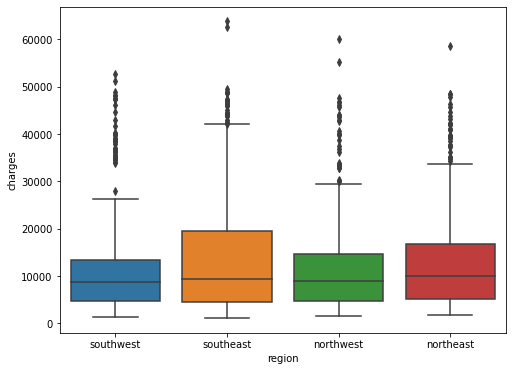

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x = "region", y = "charges", data = insurance_data)
plt.show()

From the analysis of the variables "sex" and "region", it seems that these variables are not good predictors of "charges". Rather it's the number of policy holders who smoke for each sex and region, that's influencing the charges. Therefore, again, "smoker" seems to be highly correlated with "charges". 

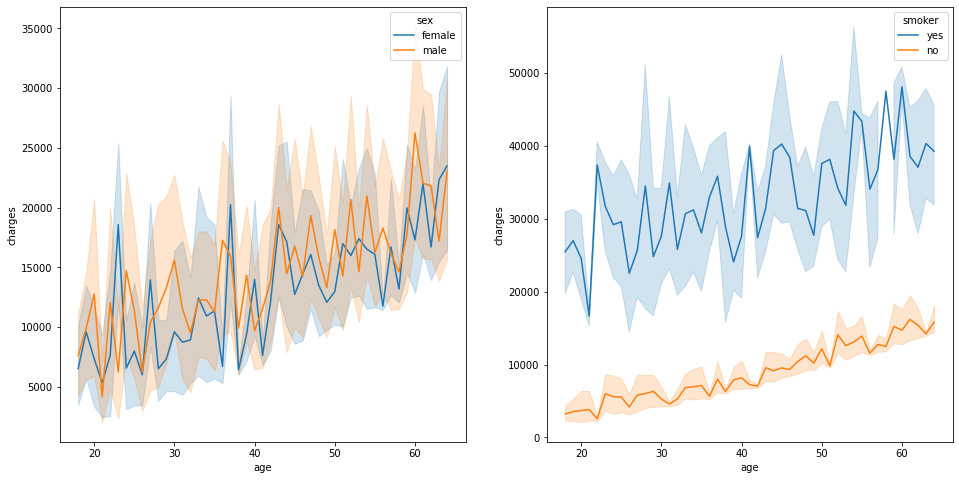

In [21]:
# further confirming what we have found so far
fig1, axes1 =plt.subplots(1,2,figsize=(16, 8))

list_1 = ["sex", "smoker"]

for i in range(len(list_1)):
    row1 = i // 1
    ax1 = axes1[row1]
    sns.lineplot(x = "age", y = "charges", data = insurance_data, ax = ax1, hue = list_1[i])

plt.show()
## Age and Charges are linearly related : the relation is positive. knowing sex of the policy holder is not adding much to the
  # Analysis. Clearly, beneficiaries who smoke are paying more for insurance  

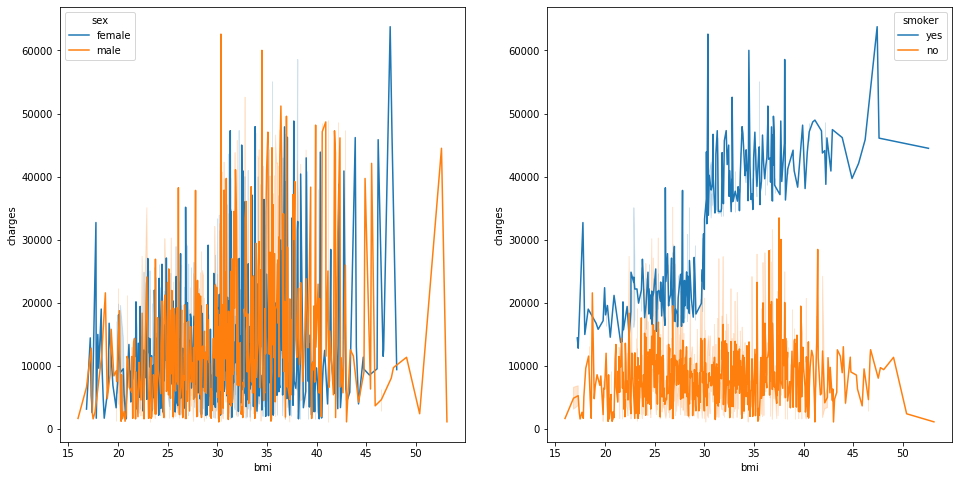

In [22]:
fig1, axes1 =plt.subplots(1,2,figsize=(16, 8))

list_1 = ["sex", "smoker"]

for i in range(len(list_1)):
    row1 = i // 1
    ax1 = axes1[row1]
    sns.lineplot(x = "bmi", y = "charges", data = insurance_data, ax = ax1, hue = list_1[i])

plt.show()

# Again knowing the sex of the policy holder is not adding much to the Analysis. As for policy holders who don't smoke, bmi 
 # and charges are weakly correlated, but for people who smoke, there seems to be a positive linear relationship
 # between charges and bmi

In [23]:
# preprocessed data
insurance = pd.read_csv("insurance_preprocessed.csv")
insurance.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520


In [24]:
## correlation matrix
corr_matrix = insurance.corr()

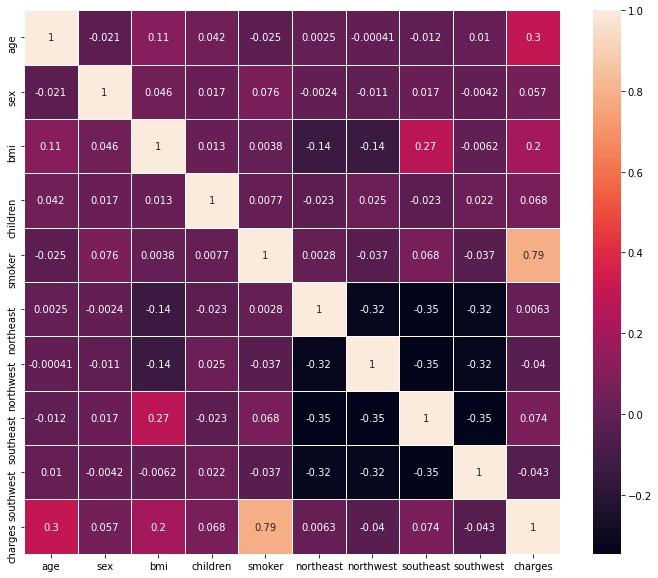

In [25]:
plt.figure(figsize = (12,10))
sns.heatmap(corr_matrix, vmax = 1, annot=True, linewidths = 0.5)
plt.show()
# smoker and charges are strongly correlated
# correlation between age and transfromed charges is weak, and so is the correlation between charges and bmi
# correlation between charges and sex, charges and region, charges and children is very close to zero

## Conclusion


For this analysis, I have analyzed the insurance data that I got from Kaggle. The dataset had one response variable, "charges", and six predictors that are: sex, bmi, children, smoker, age and region. We found that "smoker" is highly correlated with "charges", "bmi" and "age" are weakly correlated with "charges", and the remaining variables' correlations with "charges" are very close to zero.